In [1]:
import splat
import splat.empirical as spe
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
import popsims
%matplotlib inline

/Users/caganze/testsplat/splat


Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
x, y=spe.typeToTeff(20, ref='mamajek')

In [3]:
from popsims.relations import LITERATURE_POLYNOMIALS

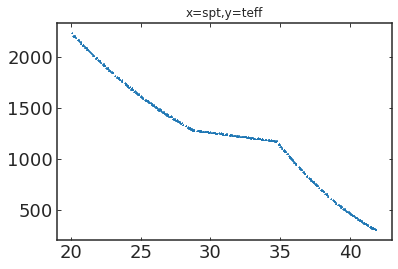

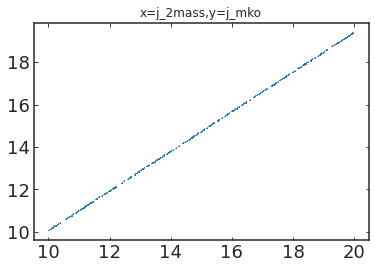

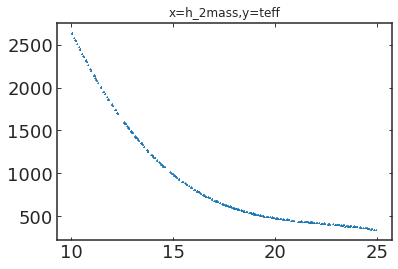

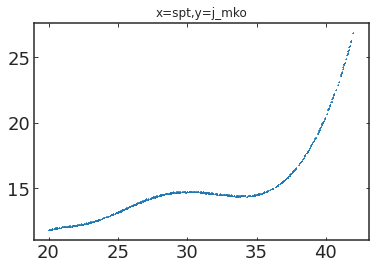

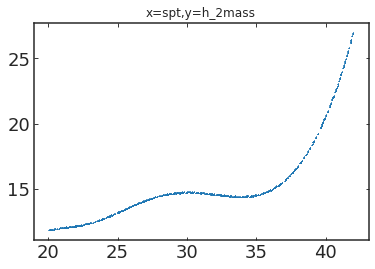

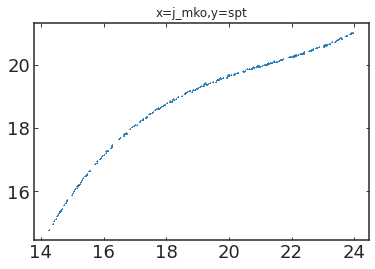

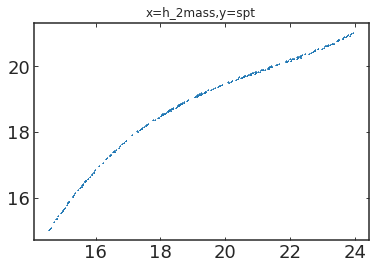

In [33]:
for k in LITERATURE_POLYNOMIALS['kirkpatrick2021']:
    pol= LITERATURE_POLYNOMIALS['kirkpatrick2021'][k]
    
    xs= np.random.uniform(10, 45, 1000)
    ys=popsims.tools.apply_polynomial_relation(pol, xs, xerr=0.0, nsample=1000)
    
    fig, ax=plt.subplots()
    ax.scatter(xs, ys[0], s=1, marker='+')
    ax.set(title=k)
    

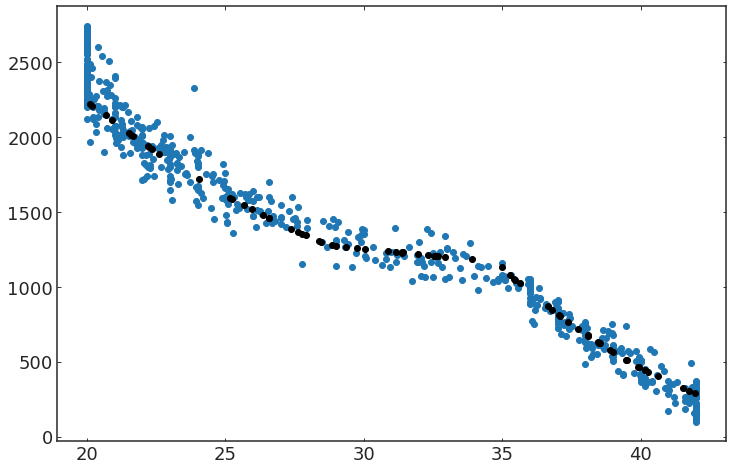

In [5]:

xs= np.random.uniform(10, 42, 100)
xerr= np.ones_like(xs)*1e-4
y, unc=popsims.tools.apply_polynomial_relation(LITERATURE_POLYNOMIALS['kirkpatrick2021']['x=spt,y=teff'], xs, xerr=xerr,  nsample=10000)


ys=np.random.uniform(100, 4000, 1000)
xgrid=np.arange(20, 43)
x=popsims.tools.inverse_polynomial_relation(LITERATURE_POLYNOMIALS['kirkpatrick2021']['x=spt,y=teff'], ys, xgrid, nsample=10000)


fig, ax=plt.subplots(figsize=(12, 8))
ax.scatter(x[0], ys, label='inverse relation')
ax.scatter(xs, y,   c='k',  label='relation')

In [11]:
d=popsims.make_systems(nsample=int(1e6))

[ 999.89476328  427.24142116 2443.21797511 ...  683.98306098 1164.68148993
  332.95509751] [ 976.33075076  472.65909469  338.49604882 ... 1111.8705838   664.58434372
  742.98716046]


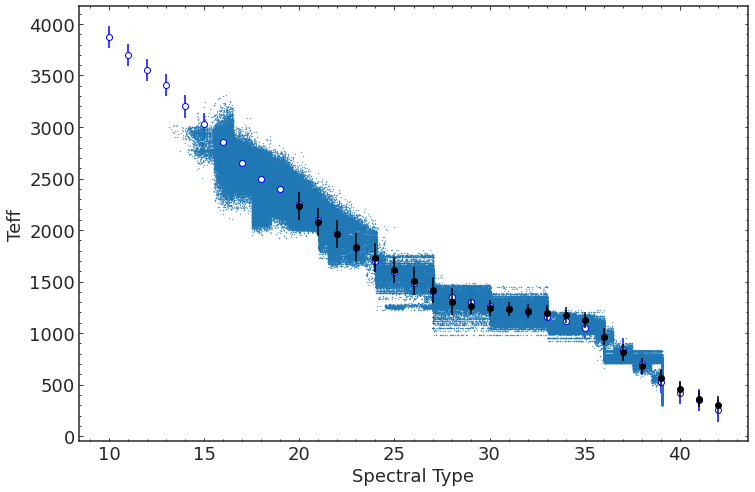

In [28]:
fig, ax=plt.subplots(figsize=(12, 8))
for a in np.arange(10, 43):
    ab=popsims.relations.spt_to_teff_kirkpatrick(a)
    ax.errorbar(a, ab[0], yerr=ab[-1], marker='o', c='k')
    
    ab_m=spe.typeToTeff(float(a), ref='mamajek')
    
    ax.errorbar(a, ab_m[0].value, yerr=ab_m[-1].value, marker='o', color='blue', \
                mfc='white', zorder=1)
    
    ax.set(xlabel='Spectral Type', ylabel='Teff')
    ax.minorticks_on()

#teffs=np.random.uniform(100, 4000, 10_0000)
ax.scatter( d.prim_spt, d.temperature, s=0.1)

In [36]:
splat.__file__

'/Users/caganze/testsplat/splat/splat/__init__.py'

In [24]:
 d.spt.min()

13.12119664909314

In [25]:
 d.spt.max()

40.30916808280054